# 0. Описать задачу словами 

Датасет содержит различные характеристики музыкальных треков. Необходимо решить задачу классификации - предсказать жанр трека по представленным признакам.

# 1. Прочитать данные 

Импортируем нужные библиотеки

In [62]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt
import seaborn as sns           
import sklearn             
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Загружаем данные

In [42]:
df = pd.read_csv("train.csv")

Посмотрим на первые 5 строчек

In [43]:
df.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать. 

In [10]:
# Основные статистические характеристики
df.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature         Class  
count    17996.000000  17996.000000  
mean         3.924039      6.695821  
std          0.361618      3.206073  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

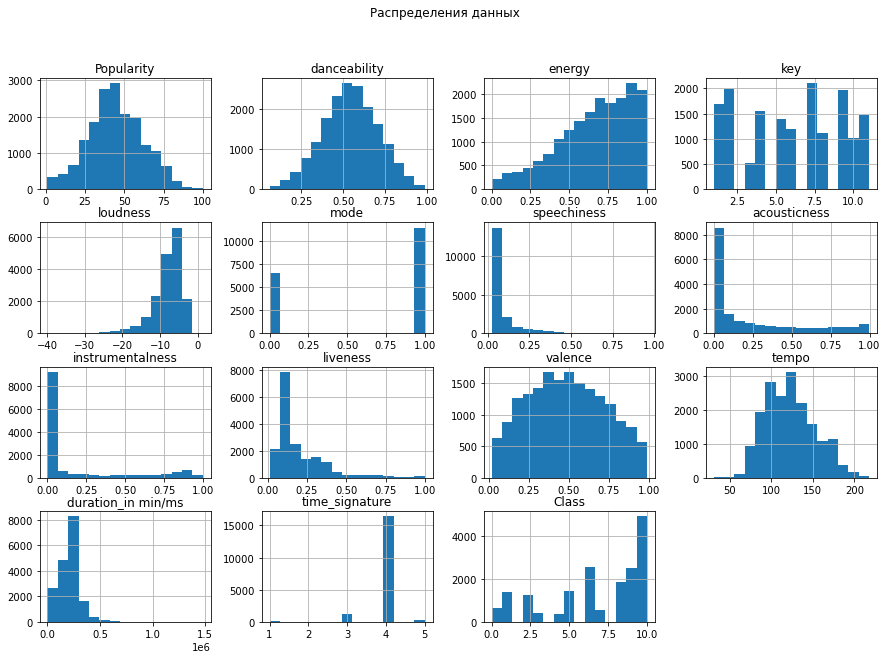

In [11]:
# Визуализация распределения данных с помощью гистограмм
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Распределения данных")
plt.show()

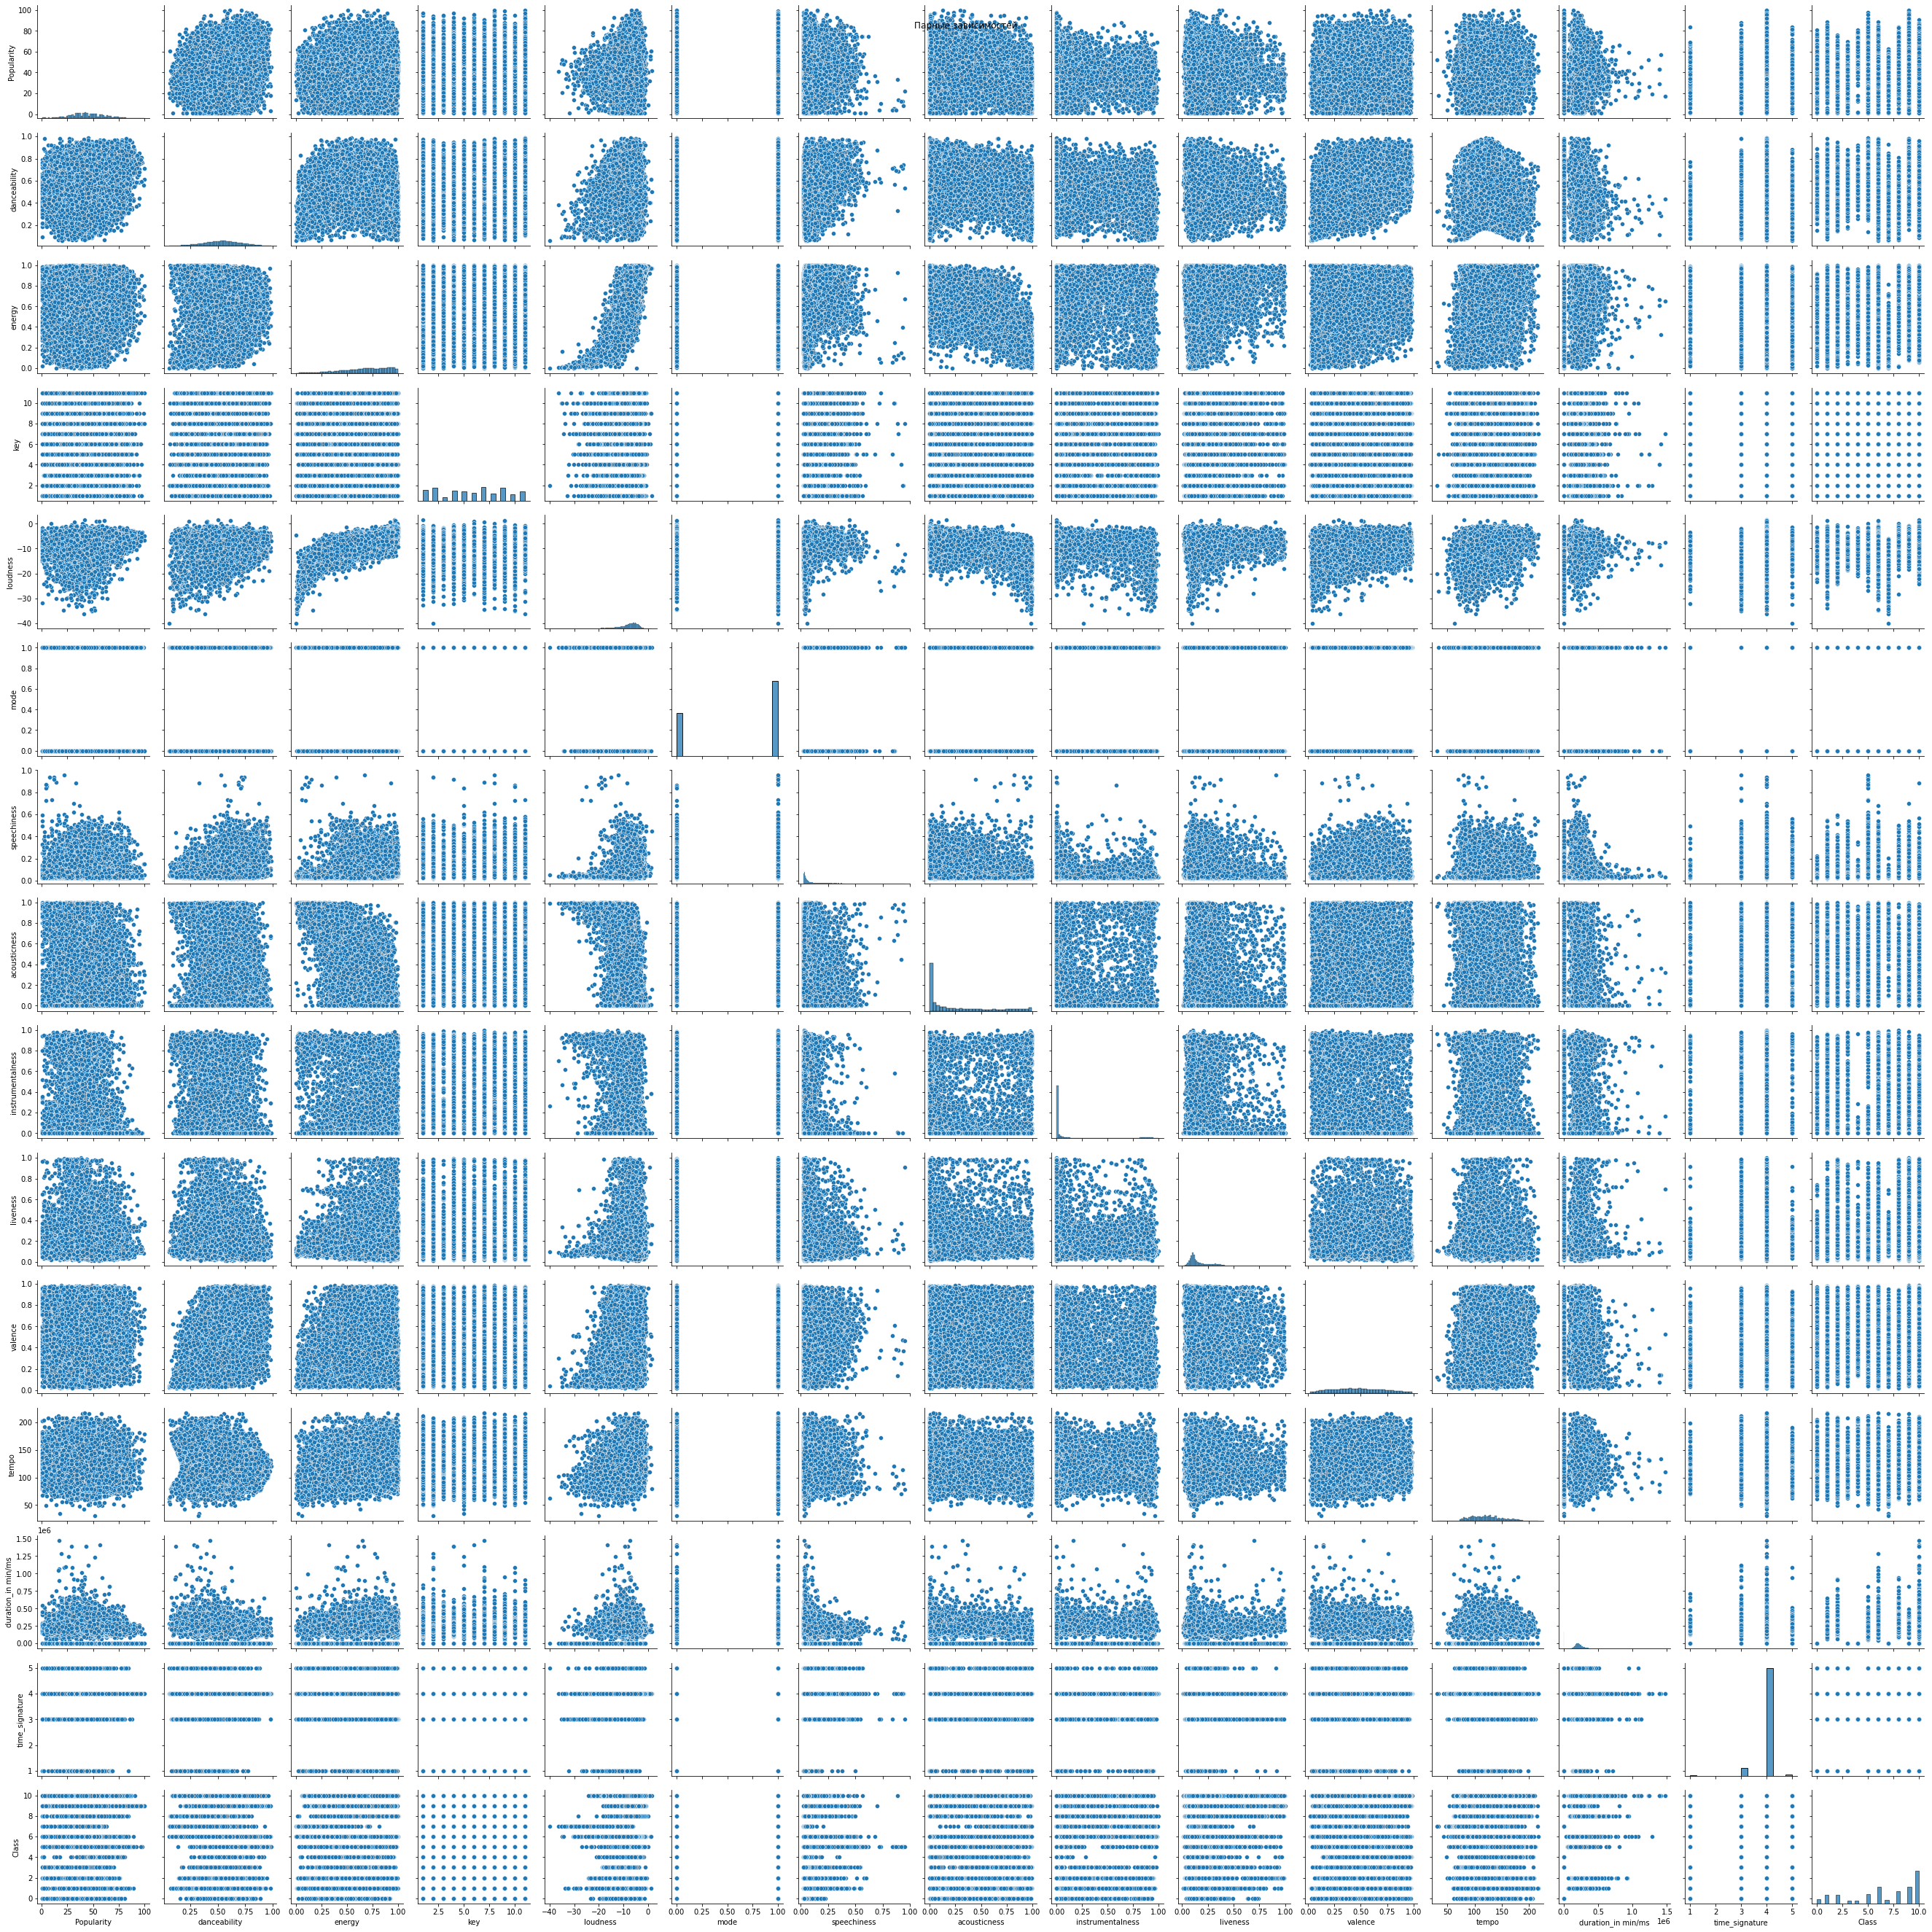

In [12]:
# Визуализация парных зависимостей с помощью pairplot
sns.pairplot(df)
plt.suptitle("Парные зависимостей")
plt.show()

In [13]:
# Вычисление и визуализация корреляционной матрицы
corr_matrix = df.corr()

print("\nКорреляционная матрица:")
print(corr_matrix)


Корреляционная матрица:
                    Popularity  danceability    energy       key  loudness  \
Popularity            1.000000      0.167213  0.051538  0.005901  0.124915   
danceability          0.167213      1.000000 -0.093838  0.006702  0.059723   
energy                0.051538     -0.093838  1.000000  0.015934  0.767869   
key                   0.005901      0.006702  0.015934  1.000000  0.002660   
loudness              0.124915      0.059723  0.767869  0.002660  1.000000   
mode                  0.016584     -0.067135 -0.035880 -0.112452 -0.033650   
speechiness           0.031664      0.199042  0.125427  0.001822  0.096027   
acousticness         -0.125410      0.009055 -0.745963 -0.009112 -0.612824   
instrumentalness     -0.167661     -0.200752 -0.180276  0.001411 -0.343672   
liveness             -0.072298     -0.109485  0.195634  0.015125  0.112022   
valence               0.054824      0.444548  0.222998  0.031744  0.181086   
tempo                -0.006050     -0.1

/tmp/ipykernel_110805/1917212956.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


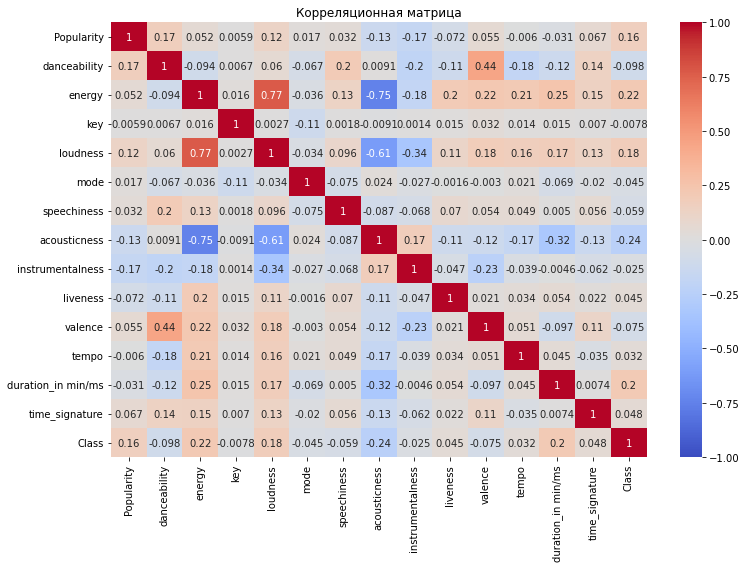

In [14]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()

3. Обработать пропущенные значения (или убедиться, что их нет) 

In [45]:
# Проверка наличия пропущенных значений
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Заполнение пропущенных значений
# Заполнение средним значением в столбце
df.fillna(df.mean(), inplace=True)

# Результат после обработки пропущенных значений
print("Количество пропущенных значений после обработки:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64
Количество пропущенных значений после обработки:
Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


/tmp/ipykernel_110805/2271604156.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


4. Обработать категориальные признаки 

Этот код анализирует DataFrame df, чтобы определить, какие из его столбцов могут быть категориальными признаками. Это необходимо для предобработки данных перед применением алгоритмов машинного обучения. Вот что делает каждый шаг:

1. Вывод информации о типах данных:
   - print("\nТипы данных:") и print(df.dtypes) выводят типы данных каждого столбца в DataFrame df. Это начальный шаг, чтобы понять, какие столбцы являются строковыми, числовыми или другими типами данных.

2. Определение потенциально категориальных признаков:
   - Создается пустой список categorical_features, который будет заполняться именами признаков, идентифицированных как категориальные.

3. Установка порога уникальных значений:
   - Устанавливается переменная unique_threshold = 10, которая используется для определения, является ли числовой признак потенциально категоризируемым. Если в столбце меньше уникальных значений, чем это пороговое значение, он будет считаться категориальным.

4. Итерация по столбцам DataFrame:
   - Код проходит по каждому столбцу в df с помощью цикла for column in df.columns:. 
   - Если имя столбца равно 'Class', он пропускается, так как, возможно, предполагается, что 'Class' — это целевой признак, который не надо модифицировать или анализировать на категорийность в этом контексте.

5. Определение категориальности признаков:
   - Если тип данных столбца — object, он добавляется в список categorical_features, поскольку столбцы типа object обычно содержат строковые или категориальные данные.
   - Если столбец не строкового типа, но количество уникальных значений в столбце меньше unique_threshold, он также добавляется в categorical_features.
   
6. Вывод обнаруженных категориальных признаков:
   - print("\nКатегориальные признаки:") и print(categorical_features) выводят список столбцов, которые идентифицированы как категориальные.

In [46]:
# Просмотр информации о типах данных
print("\nТипы данных:")
print(df.dtypes)

# Определение потенциально категориальных признаков
categorical_features = []

# Установим пороговое значение для уникальных элементов
unique_threshold = 10

for column in df.columns:
    if column == 'Class':
        continue
    # Проверяем, является ли тип данных объекта строковым (обычно категориальные признаются такими)
    elif df[column].dtype == 'object':
        categorical_features.append(column)
    # Либо если количество уникальных значений меньше порогового значения
    elif df[column].nunique() < unique_threshold:
        categorical_features.append(column)

print("\nКатегориальные признаки:")
print(categorical_features)


Типы данных:
Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

Категориальные признаки:
['Artist Name', 'Track Name', 'mode', 'time_signature']


Этот код выполняет преобразование категориальных признаков в числовые с помощью кодировщика меток (LabelEncoder) из библиотеки sklearn. Это полезно, когда необходимо преобразовать категориальные данные перед передачей их в алгоритмы машинного обучения, которые требуют числового ввода.

Вот как работает код:

1. Импортирование LabelEncoder:
   - LabelEncoder из sklearn.preprocessing позволяет преобразовывать категориальные значения в число, присваивая каждой категории уникальное целочисленное значение.

2. Создание словаря для кодировщиков:
   - label_encoders — это пустой словарь, который будет использоваться для хранения объекта LabelEncoder для каждого категориального признака. Это позволяет позже декодировать данные обратно или использовать кодировщики для других наборов данных с аналогичными признаками.

3. Преобразование категориальных признаков:
   - Цикл for feature in categorical_features: выполняется для каждого признака в списке categorical_features, который содержит имена категориальных признаков в df.
   - Для каждого признака создается объект LabelEncoder и добавляется в label_encoders под ключом имени признака.
   - Признак в df преобразуется с помощью метода fit_transform(), который обучает кодировщик на данных этого признака и одновременно преобразует значения в числовой формат.

4. Вывод результатов:
   - После преобразования выводится обновленный DataFrame df, где категории заменены на их числовые эквиваленты.

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    df[feature] = label_encoders[feature].fit_transform(df[feature])

print("\nПосле Label Encoding:")
print(df.head())


После Label Encoding:
   Artist Name  Track Name  Popularity  danceability  energy   key  loudness  \
0         1182       11406        60.0         0.854   0.564   1.0    -4.964   
1         1092        4988        54.0         0.382   0.814   3.0    -7.230   
2         7899        8144        35.0         0.434   0.614   6.0    -8.334   
3         1987        6753        66.0         0.853   0.597  10.0    -6.528   
4         6283        8167        53.0         0.167   0.975   2.0    -4.279   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0485      0.017100          0.177562    0.0849   0.8990   
1     1       0.0406      0.001100          0.004010    0.1010   0.5690   
2     1       0.0525      0.486000          0.000196    0.3940   0.7870   
3     0       0.0555      0.021200          0.177562    0.1220   0.5690   
4     1       0.2160      0.000169          0.016100    0.1720   0.0918   

     tempo  duration_in min/ms  time_signatur

5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна) 

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Исключим категориальные признаки и признак 'Class'
features_to_normalize = [col for col in df.columns if col not in categorical_features + ['Class']]

# Инициализируем MinMaxScaler
scaler = MinMaxScaler()

# Копируем DataFrame для нормализации, чтобы не изменять оригинальный
df_normalized = df.copy()

# Применяем Min-Max Scaling к нужным признакам
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

print("\nПосле Min-Max нормализации:")
print(df_normalized.head())


После Min-Max нормализации:
   Artist Name  Track Name  Popularity  danceability    energy  key  loudness  \
0         1182       11406    0.595960      0.854745  0.563991  0.0  0.847024   
1         1092        4988    0.535354      0.346890  0.813996  0.2  0.792166   
2         7899        8144    0.343434      0.402841  0.613992  0.5  0.765439   
3         1987        6753    0.656566      0.853669  0.596992  0.9  0.809161   
4         6283        8167    0.525253      0.115558  0.974999  0.1  0.863607   

   mode  speechiness  acousticness  instrumentalness  liveness   valence  \
0     1     0.027882      0.017169          0.178274  0.073879  0.910096   
1     1     0.019410      0.001104          0.004025  0.090173  0.569081   
2     1     0.032172      0.487952          0.000196  0.386702  0.794358   
3     0     0.035389      0.021285          0.178274  0.111426  0.569081   
4     1     0.207507      0.000170          0.016164  0.162028  0.075953   

      tempo  duration_in mi

6. Разбить данные на обучающую и тестовую выборки 

In [49]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Class')  # Все, кроме целевого признака
y = df['Class']  # Целевой признак

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # 20% — для тестовой выборки, random_state для воспроизводимости

print("Размеры выборок:")
print("Обучающая выборка: X_train -", X_train.shape, "y_train -", y_train.shape)
print("Тестовая выборка: X_test -", X_test.shape, "y_test -", y_test.shape)

Размеры выборок:
Обучающая выборка: X_train - (14396, 16) y_train - (14396,)
Тестовая выборка: X_test - (3600, 16) y_test - (3600,)


7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор) 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Инициализация классификатора KNN
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors - параметр K

# Обучение модели
knn.fit(X_train, y_train)

# Предсказание
y_pred = knn.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.20472222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.48      0.38       136
           1       0.09      0.20      0.12       286
           2       0.12      0.18      0.14       281
           3       0.38      0.49      0.43        78
           4       0.19      0.14      0.16        71
           5       0.14      0.20      0.16       262
           6       0.16      0.16      0.16       500
           7       0.34      0.20      0.26       103
           8       0.20      0.10      0.14       382
           9       0.36      0.21      0.27       531
          10       0.30      0.22      0.25       970

    accuracy                           0.20      3600
   macro avg       0.24      0.23      0.22      3600
weighted avg       0.24      0.20      0.21      3600



8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра)

Этот код выполняет подбор гиперпараметров для алгоритма K ближайших соседей (KNN) с использованием поиска по сетке (Grid Search) и оценивает его производительность на тестовой выборке. Вот что именно делает код:

1. Настройка параметров для поиска:
   - Словарь param_grid определяет диапазон значений гиперпараметра n_neighbors (число ближайших соседей) от 10 до 49. Этот спектр значений будет использован для подбора наилучшего гиперпараметра.

2. Инициализация классификатора KNN:
   - Создается объект классификатора KNN (knn = KNeighborsClassifier()), который будет использоваться в процессе поиска по сетке.

3. Настройка GridSearchCV:
   - GridSearchCV настраивается для выполнения поиска лучших значений гиперпараметров с использованием 5-кратной кросс-валидации (cv=5). Этот процесс оценивает производительность каждой комбинации гиперпараметров по метрике точности (scoring='accuracy'). 

4. Запуск поиска по сетке:
   - grid_search.fit(X_train, y_train) запускает процесс подбора гиперпараметров на обучающей выборке X_train и соответствующих метках y_train.

5. Вывод лучших параметров и лучшего результата:
   - Печатается лучшее значение гиперпараметра k (количество соседей) из grid_search.best_params_.
   - Печатается лучший средний показатель точности, достигнутый на обучении в процессе кросс-валидации, из grid_search.best_score_.

6. Оценка модели на тестовой выборке:
   - Лучшая модель KNN (best_knn = grid_search.best_estimator_) используется для предсказания результатов на тестовой выборке X_test.
   - Печатается точность на тестовой выборке с использованием accuracy_score(y_test, y_pred).
   - Выдается отчет классификации для тестовой выборки (classification_report(y_test, y_pred)), который включает точность, полноту (recall), F1-оценку и другие метрики для каждого класса.

In [55]:
from sklearn.model_selection import GridSearchCV

# Настройка параметров для поиска
param_grid = {'n_neighbors': range(10, 50)}

# Инициализация классификатора KNN
knn = KNeighborsClassifier()

# Настройка GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')  # cv=5 для 5-кратной кросс-валидации

# Запуск поиска
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и лучшего результата
print("Лучшее значение k:", grid_search.best_params_)
print("Лучшая точность на обучении:", grid_search.best_score_)

# Оценка на тестовых данных с лучшими параметрами
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Точность на тестовой выборке:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Лучшее значение k: {'n_neighbors': 44}
Лучшая точность на обучении: 0.2993191356952646
Точность на тестовой выборке: 0.29388888888888887

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.40      0.34       136
           1       0.29      0.01      0.01       286
           2       0.25      0.01      0.02       281
           3       0.26      0.24      0.25        78
           4       0.09      0.04      0.06        71
           5       0.23      0.11      0.15       262
           6       0.18      0.08      0.11       500
           7       0.19      0.22      0.20       103
           8       0.26      0.09      0.13       382
           9       0.36      0.27      0.31       531
          10       0.31      0.73      0.43       970

    accuracy                           0.29      3600
   macro avg       0.25      0.20      0.18      3600
weighted avg       0.27      0.29      0.23      3600



9. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 

Этот код осуществляет оценку производительности предварительно обученной модели K ближайших соседей (KNN), найденной с помощью поиска по сетке гиперпараметров (grid_search). Основные шаги включают оценку модели на обучающей и тестовой выборках, вычисление и вывод метрик качества. Вот подробности каждого шага:

1. Получение лучшей модели KNN:
   - best_knn = grid_search.best_estimator_ достает из grid_search модель с наилучшими гиперпараметрами, найденную в процессе поиска по сетке.

2. Предсказания для обучающей и тестовой выборок:
   - y_train_pred = best_knn.predict(X_train) делает предсказания на обучающей выборке X_train.
   - y_test_pred = best_knn.predict(X_test) делает предсказания на тестовой выборке X_test.

3. Оценка модели на обучающей выборке:
   - Вычисляется точность на обучающей выборке с помощью accuracy_score(y_train, y_train_pred).
   - Создается матрица ошибок (confusion matrix) для обучающей выборки с помощью confusion_matrix(y_train, y_train_pred).
   - Выводится точность, матрица ошибок и отчет классификации для обучающей выборки, последний из которых предоставляется функцией classification_report(y_train, y_train_pred). Отчет классификации включает метрики precision, recall, F1-score для каждой категории.

4. Оценка модели на тестовой выборке:
   - Аналогично, вычисляется точность на тестовой выборке accuracy_score(y_test, y_test_pred).
   - Создается и выводится матрица ошибок для тестовой выборки confusion_matrix(y_test, y_test_pred).
   - Выводится отчет классификации для тестовой выборки с помощью classification_report(y_test, y_test_pred).

In [58]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Получение лучшей модели
best_knn = grid_search.best_estimator_

# Предсказания и оценки качества модели
y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)

# Оценка обучающей выборки
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
print(f"Точность на обучающей выборке: {train_accuracy:.2f}")
print("\nConfusion Matrix (Train):\n", train_conf_matrix)
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))

# Оценка тестовой выборки
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"Точность на тестовой выборке: {test_accuracy:.2f}")
print("\nConfusion Matrix (Test):\n", test_conf_matrix)
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

Точность на обучающей выборке: 0.34

Confusion Matrix (Train):
 [[ 242    0    0   55   35    0    0   91    0   66    0]
 [   0    9    5    0    0   36   99    0   39   63  836]
 [   0    4   11    0    0   31   67    0   65   64  749]
 [ 100    0    0  107   28    0    0   49    0   40    0]
 [ 113    0    0   55   34    0    0   69    0   45    0]
 [   0    5    3    0    0  145  111    0   25  145  751]
 [   0   12   10    0    0   79  252    1   78  142 1513]
 [ 158    0    0   57   33    0    0  155    0   70    0]
 [   0    5    9    0    0   20   76    0  143   40 1179]
 [  70    5    4   35   18   80  119   59   20  630  953]
 [  59    7   13    9   12  104  204   41  141  269 3120]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.33      0.49      0.39       489
           1       0.19      0.01      0.02      1087
           2       0.20      0.01      0.02       991
           3       0.34      0.33      0.33    

10. Запустить другие классификаторы и выбрать параметры. Выбрать релевантные! Сравнить результаты 

Этот код выполняет обучение и подбор гиперпараметров для трех различных моделей машинного обучения с последующей их оценкой. Вот основные шаги, которые выполняются в коде:

1. Импорт необходимых классов:
   - Импортируются три модели: LogisticRegression, RandomForestClassifier и DecisionTreeClassifier из библиотеки sklearn.

2. Обучение и подбор параметров для логистической регрессии:
   - Создается объект LogisticRegression с параметром максимального числа итераций max_iter=1000, чтобы гарантировать сходимость.
   - Определяется сетка значений гиперпараметра C (обратная величина регуляризации) для подбора.
   - GridSearchCV используется для поиска наилучшего значения гиперпараметра C, выполняя 5-кратную кросс-проверку на обучающих данных X_train и y_train.
   - Наилучшая модель сохраняется в best_logreg.

3. Обучение и подбор параметров для случайного леса:
   - Создается объект RandomForestClassifier.
   - Определяется сетка значений для n_estimators (количество деревьев в лесу).
   - GridSearchCV выполняет подбор гиперпараметров аналогично первому этапу, и сохраняется лучшая модель в best_rf.

4. Обучение и подбор параметров для дерева решений:
   - Создается объект DecisionTreeClassifier.
   - Определяется сетка значений для max_depth (максимальная глубина дерева).
   - GridSearchCV выполняет подбор гиперпараметров и сохраняет лучшую модель в best_dt.

5. Оценка на тестовой выборке:
   - Для каждой из трех лучших моделей (best_logreg, best_rf, best_dt) предсказываются результаты на обучающей выборке X_train и тестовой выборке X_test.
   - Выводятся метрики точности (accuracy) на обучающей и тестовой выборках.
   - Генерируется и выводится подробный отчет о классификации на тестовой выборке, включая такие метрики, как precision, recall и F1-score, используя classification_report.

В конечном итоге этот код помогает сравнить производительность трех алгоритмов машинного обучения с оптимальными гиперпараметрами, чтобы выбрать наиболее подходящий для данной задачи.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Логистическая регрессия
logreg = LogisticRegression(max_iter=1000)
param_grid_logreg = {
    'C': [0.1, 1, 10]
}
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', verbose=2)
grid_logreg.fit(X_train, y_train)
best_logreg = grid_logreg.best_estimator_

# Случайный лес
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=2)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Дерево решений
dt = DecisionTreeClassifier()
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
}
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', verbose=2)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# Оценка на тестовой выборке
for clf, name in zip([best_logreg, best_rf, best_dt], ['Logistic Regression', 'Random Forest', 'Decision Tree']):
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    print(f"\n{name}:")
    print(f"Точность на обучающей выборке: {accuracy_score(y_train, y_pred_train):.2f}")
    print(f"Точность на тестовой выборке: {accuracy_score(y_test, y_pred_test):.2f}")
    print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ..............................................C=0.1; total time=   3.5s
[CV] END ..............................................C=0.1; total time=   3.4s
[CV] END ..............................................C=0.1; total time=   3.4s
[CV] END ..............................................C=0.1; total time=   3.5s
[CV] END ..............................................C=0.1; total time=   3.6s
[CV] END ................................................C=1; total time=   3.6s
[CV] END ................................................C=1; total time=   3.7s
[CV] END ................................................C=1; total time=   4.0s
[CV] END ................................................C=1; total time=   3.7s
[CV] END ................................................C=1; total time=   4.3s
[CV] END ...............................................C=10; total time=   3.8s
[CV] END ........................................

11. как-то побороться с несбалансированностью классов (если она есть) 

Многие алгоритмы, такие как логистическая регрессия, случайный лес и метод опорных векторов, поддерживают параметр class_weight, который можно настроить как 'balanced', чтобы модель автоматически учитывала несбалансированность классов.

In [69]:
# Случайный лес
rf = RandomForestClassifier(class_weight='balanced')
param_grid_rf = {
    'n_estimators': [50, 100, 200],
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=2)
grid_rf.fit(X_train, y_train)
best_rf_balanced = grid_rf.best_estimator_

y_pred_train = best_rf_balanced.predict(X_train)
y_pred_test = best_rf_balanced.predict(X_test)
    
print("\nСбалансированный Random Forest:")
print(f"Точность на обучающей выборке: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Точность на тестовой выборке: {accuracy_score(y_test, y_pred_test):.2f}")
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ...................................n_estimators=100; total time=   3.3s
[CV] END ...................................n_estimators=100; total time=   3.4s
[CV] END ...................................n_estimators=100; total time=   3.4s
[CV] END ...................................n_estimators=100; total time=   3.4s
[CV] END ...................................n_estimators=100; total time=   3.4s
[CV] END ...................................n_estimators=200; total time=   7.0s
[CV] END ...................................n_est

12. исключить коррелированные переменные (объяснить зачем) 

Исключение коррелированных переменных из набора данных может значительно улучшить качество модели и её интерпретируемость. Ниже приведены основные причины, по которым стоит рассматривать устранение высокой корреляции между переменными:

### Причины для исключения коррелированных переменных:

1. Избыточность информации:
   - Коррелированные переменные содержат избыточную информацию, так как они объясняют одни и те же аспекты данных. Это может делать модель более сложной, не добавляя существенной ценности, в отличие от независимых переменных, каждая из которых вносит уникальную информацию.

2. Проблемы с интерпретацией:
   - Высокая корреляция между переменными может затруднить интерпретацию модели. Когда переменные коррелированы, трудно точно сказать, какая именно переменная влияет на целевую, и в какой степени.

3. Мультиядерная коллинеарность:
   - Это проблема для многих моделей, таких как линейная регрессия, где высокая корреляция приводит к мультиядерной коллинеарности. Это означает, что становится сложно, а иногда невозможно, оценить уникальное влияние каждой переменной на целевую переменную, что также может влиять на нестабильность коэффициентов модели.

4. Снижение риска переобучения:
   - Удаление избыточной информации может помочь снизить риск переобучения модели, когда она слишком хорошо адаптируется к обучающим данным и плохо обобщает знания на новые данные.

5. Улучшение времени обучения:
   - Исключение избыточных переменных уменьшает размерность данных, что может значительно ускорить процесс обучения модели, особенно для сложных алгоритмов.

Этот код выполняет следующие шаги для обработки набора данных df:

1. Выбор только числовых признаков:
   - df_numeric = df[features_to_normalize] извлекает столбцы features_to_normalize из DataFrame df. Предполагается, что features_to_normalize содержит имена столбцов, которые являются числовыми и подлежат нормализации или корреляционному анализу.

2. Вычисление матрицы корреляций:
   - correlation_matrix = df_numeric.corr().abs() вычисляет абсолютные значения коэффициентов корреляции Пирсона между всеми парами числовых признаков в df_numeric. В результате получается квадратная матрица, где каждый элемент (i, j) показывает, насколько сильно коррелируют соответствующие признаки.

3. Поиск признаков с высокой корреляцией и удаление их:
   - Устанавливается порог корреляции correlation_threshold = 0.5. Это значение определяет, какие признаки считаются слишком сильно коррелированными.
   - upper_triangle извлекает верхнюю треугольную часть матрицы корреляции (без диагонали), чтобы избежать дублирования рассмотрения пар признаков (например, (i, j) и (j, i)).
   - to_drop является списком имен столбцов, для которых обнаружены высокие корреляции с любым другим признаком выше установленного порога. Столбцы добавляются в список to_drop, если хотя бы один коэффициент корреляции в соответствующем столбце upper_triangle превышает correlation_threshold.

4. Вывод признаков для удаления:
   - print(f'Признаки для удаления: {to_drop}') выводит список признаков, которые будут удалены из данных, поскольку они имеют высокую корреляцию с другими признаками и могут вносить избыточную информацию в модель.

In [73]:
# 1. Выбор только числовых признаков
df_numeric = df[features_to_normalize]

# 2. Вычисляем матрицу корреляций
correlation_matrix = df_numeric.corr().abs()

# Устанавливаем порог корреляции
correlation_threshold = 0.5

# 3. Ищем признаки с высокой корреляцией и удаляем их
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

print(f'Признаки для удаления: {to_drop}')

Признаки для удаления: ['loudness', 'acousticness']


Этот код выполняет следующие шаги:

1. Удаление коррелированных признаков:
   - Создается DataFrame df_reduced путем удаления колонок, перечисленных в to_drop, из исходного DataFrame df. Предполагается, что to_drop содержит список имен столбцов, которые имеют высокую корреляцию друг с другом и были предварительно определены для удаления.

2. Определение признаков и целевой переменной:
   - X создается как DataFrame, содержащий все признаки из df, кроме целевого признака, который здесь назван ‘Class’. Это будет использоваться как входные данные для обучения модели.
   - y представляет собой серию, содержащую целевой признак ‘Class’, который используется как выходные (целевые) данные при обучении модели.

3. Разделение на обучающую и тестовую выборки:
   - train_test_split используется для разделения данных на обучающий и тестовый наборы. Здесь:
     - X_train и y_train составят обучающую выборку.
     - X_test и y_test составят тестовую выборку.
     - test_size=0.2 означает, что 20% всех данных будут отведены для тестовой выборки.
     - random_state=42 обеспечивает воспроизводимость результата разбиения; использование одного и того же значения гарантирует одинаковый результат разбиения при каждом запуске.


In [74]:
# Удаляем коррелированные признаки
df_reduced = df.drop(columns=to_drop)

X = df.drop(columns='Class')  # Все, кроме целевого признака
y = df['Class']  # Целевой признак

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)  # 20% — для тестовой выборки, random_state для воспроизводимости

Этот код выполняет следующие шаги:

1. Создание модели "Случайный лес":
   - RandomForestClassifier инициализируется с параметром class_weight='balanced'. Это означает, что веса классов автоматически подстраиваются, чтобы компенсировать дисбаланс классов. Это помогает модели уделять равное внимание каждому классу, что особенно полезно, если один из классов сильно преобладает.

2. Определение сетки гиперпараметров:
   - param_grid_rf определяет сетку значений для одного из гиперпараметров модели: n_estimators, который определяет количество деревьев в лесу. Здесь рассматриваются три возможных значения: 50, 100 и 200.

3. Процесс поиска по сетке (Grid Search):
   - GridSearchCV используется для поиска наилучших значений гиперпараметров. Она выполняет перекрестную проверку (cross-validation) на обучающих данных (cv=5 указывает на использование 5- кратной перекрестной проверки) и оценивает каждую комбинацию параметров по критерию точности (scoring='accuracy').
   - verbose=2 предоставляет подробную информацию о процессе обучения для каждой комбинации параметров.

4. Обучение модели:
   - Используя обучающие данные X_train и y_train, GridSearchCV выполняет процесс поиска по сетке, чтобы определить лучшую модель. Этой моделью становится best_rf_balanced.

5. Предсказание и оценка производительности:
   - Лучшей моделью (best_rf_balanced) делаются предсказания как на обучающей выборке (X_train), так и на тестовой выборке (X_test), результат которых сохраняется в y_pred_train и y_pred_test соответственно.
   - Точность модели вычисляется как на обучающей (для оценки переобучения), так и на тестовой выборке (для оценки обобщающей способности модели) с использованием функции accuracy_score.
   - Печатается отчет о классификации на тестовой выборке с использованием classification_report, который предоставляет более детальную информацию о производительности модели, включая такие метрики, как precision, recall и F1-score.

In [75]:
# Случайный лес
rf = RandomForestClassifier(class_weight='balanced')
param_grid_rf = {
    'n_estimators': [50, 100, 200],
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=2)
grid_rf.fit(X_train, y_train)
best_rf_balanced = grid_rf.best_estimator_

y_pred_train = best_rf_balanced.predict(X_train)
y_pred_test = best_rf_balanced.predict(X_test)
    
print("\nСбалансированный Random Forest:")
print(f"Точность на обучающей выборке: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Точность на тестовой выборке: {accuracy_score(y_test, y_pred_test):.2f}")
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ....................................n_estimators=50; total time=   1.7s
[CV] END ....................................n_estimators=50; total time=   1.6s
[CV] END ...................................n_estimators=100; total time=   3.3s
[CV] END ...................................n_estimators=100; total time=   3.5s
[CV] END ...................................n_estimators=100; total time=   3.3s
[CV] END ...................................n_estimators=100; total time=   3.3s
[CV] END ...................................n_estimators=100; total time=   3.3s
[CV] END ...................................n_estimators=200; total time=   6.6s
[CV] END ...................................n_est

13. Сделать общие выводы

## Выводы

В ходе проекта мы провели всесторонний анализ и обучение моделей машинного обучения на имеющихся данных. Основные этапы и результаты работы следующие:

1. Предварительная обработка данных:
    - Мы загрузили данные и выполнили необходимые этапы очистки, включая удаление пропущенных значений, заменив их средними значениями по соответствующим признакам.
    - Проведена обработка категориальных признаков путем их преобразования в числовой формат, а также нормализация вещественных признаков для унификации масштаба данных.

2. Обучение моделей:
    - В первую очередь была натренирована модель K-ближайших соседей (KNN). Однако, даже с подбором гиперпараметров, качество классификации оставалось низким.
    - Далее, мы протестировали логистическую регрессию, RandomForest и деревья решений, проведя их обучение с подбором оптимальных параметров.
    - Из всех протестированных моделей, RandomForest показал лучшие результаты, достигнув точности 0.52 на тестовой выборке.

3. Анализ дисбаланса классов:
    - Из-за выявленного несбалансированного распределения классов в данных, мы обучили версию RandomForest со сбалансированными весами классов. Это, однако, не привело к значительному улучшению качества модели.

4. Анализ корреляции признаков:
    - Мы идентифицировали признаки с высокой корреляцией и удалили их, однако, повторное обучение модели не улучшило точности.

Общий вывод заключается в том, что метод RandomForest оказался наиболее эффективным среди использованных подходов для данных с данной структурой и характеристиками, несмотря на возникающие трудности с балансировкой классов и избыточной корреляцией. Для дальнейшего улучшения результатов возможно потребуется рассмотрение новых методов выбора признаков, расширение датасета или использование методов, учитывающих более сложные взаимосвязи в данных.